In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
def bool_to_color(X):
    # Mapping the resulting boolean variable to a color for represent the spin
    mapping = {'0':'r', '1':'b'}
    return [mapping[str(int(xi))] for xi in X]

def generate_graph(A, X):
    # Create DiGraph from A
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

    # Use spring_layout to handle positioning of graph
    layout = nx.spring_layout(G)
    
    # Use a list for node colours
    color_map = bool_to_color(X)

    # Draw the graph using the layout - with_labels=True if you want node labels.
    nx.draw(G, layout, with_labels=True, node_color=color_map)

    # Get weights of each edge and assign to labels
    #labels = nx.get_edge_attributes(G, "weight")
    labels = dict([((u,v,), f'{d["weight"]:.1f}') for u,v,d in G.edges(data=True)])
                    
    # Draw edge labels using layout and list of labels
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

    # Show plot
    plt.show()

#  Funcion optimización
Para este problema la euristica a minimizar a través del algoritmo es el  hamiltoniano del problema
$$
H=-\sum_{i, j} J_{i j} \sigma_i \sigma_j+h \sum_i \sigma_i
$$
Acá, $\sigma_i$ representa el valor del espin y $J_{ij}$ es el acople entre los espines i y j

En la implementación usaremos valores boleanos 0 y 1 como variables que representan a los espines -1/2 y 1/2.

In [4]:
A = []
def hamiltonian(X):
    # evaluation function
    sum_h = 0
    for i in range(A.shape[0]):
        for j in range(i):
            sum_h -= A[i,j]*(X[i]-1/2)*((X[j]-1/2))*4
    return sum_h

def magnetization(X):
    # Here "magnetization" will be the sum of the spins
    mapping = {0:-1,1:1}
    M = 0
    for xi in X: M += mapping[int(xi)]
    return M

In [5]:
def eq_array(A,B):
    # Check if an array has the same
    n=-1
    while True:
        try:
            n = A.index(B[0],n+1)
        except ValueError:
            return False
        if A[n:n+len(B)]==B:
            return True
        
def is_new_array(A,B):
    bol_sum = list(np.array(A)+np.array(B))
    if (not eq_array(A,B)) and (not eq_array(bol_sum, [1 for i in range(len(A))])):
        return True
    else:
        return False
    

In [6]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import time

def generate_solutions(A):
    N = A.shape[0]*5
    best_solutions = []


    # Measuring execution time
    st = time.time()

    for i in range(N):
        print(i,' generation ----------')
        model=ga(function=hamiltonian,dimension=A.shape[0],variable_type='bool');
        model.run();
        i_solution = list(model.best_variable)
        new = 1
        if i==0:
            best_solutions.append(list(model.best_variable))
        for bs in best_solutions: 
            new *= is_new_array(i_solution, bs)
        if new:
            best_solutions.append(list(model.best_variable))

    et = time.time()
    # get the execution time
    elapsed_time = et - st
    print('Total execution time:', elapsed_time, 'seconds')
    
    return best_solutions

def analize_solutions(best_solutions, A):
    # Filter the solutions to get the only those with the minimun energy
    print('Solutions found: ',len(best_solutions))
    best_solutions.sort(key=hamiltonian)
    Hmin = hamiltonian(best_solutions[0])
    for bs in best_solutions:
        hbs = hamiltonian(bs)
        if hbs <= Hmin:
            Hmin = hbs
            print('-------------------')
            print('Magnetization: ',magnetization(bs))
            print('H:',hamiltonian(bs))
            generate_graph(A, bs)

# Sección de testeo:
### A continuación se muestran los resultados para algunos sistemas bien conocidos

## N= 4
Este es un sistema rectangular bien conocido en el que la solución a interacciones positivas $J>0$ son espines alineados (izquierda), mientras que la negativas (derecha) son espines antiparalelos a sus dos vecinos.
<img src="imagenes/square_solution.png"/>

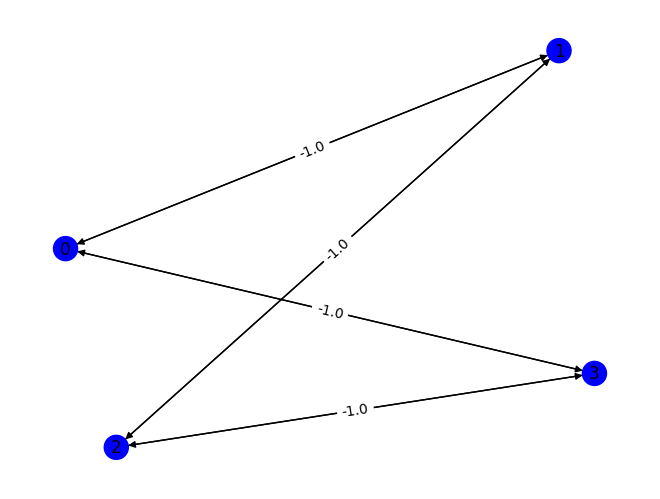

In [8]:
# Interaction matrix
A0 =np.array([[0, 0, 0, 0],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [1, 0, 1, 0]])
At = np.transpose(A0)
A = A0 + At
A = -A
X = np.ones(A.shape[0])

generate_graph(A,X)

In [9]:
%%capture
# Calculate the solutions
best_solutions = generate_solutions(A)

Solutions found:  1
-------------------
Magnetization:  0
H: -4.0


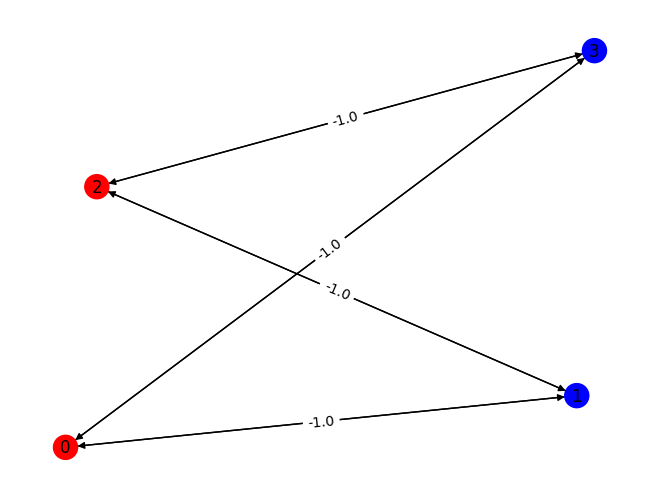

In [10]:
# Filter the solutions and visualize only the ground states
analize_solutions(best_solutions, A)

# N = 3

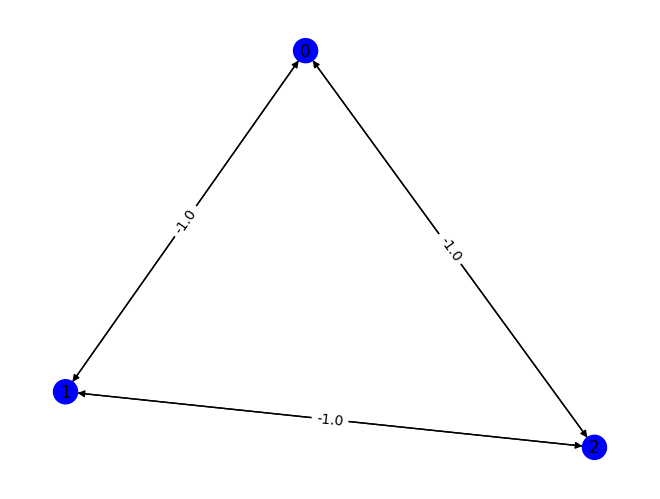

In [11]:
A0 = np.array([[0, 0, 0],
              [1, 0, 0],
              [1, 1, 0]])
At = np.transpose(A0)
A = A0 + At
A = -A
X = np.ones(A.shape[0])

generate_graph(A,X)

In [12]:
%%capture
# Calculate the solutions
best_solutions = generate_solutions(A)

Solutions found:  3
-------------------
Magnetization:  -1
H: -1.0


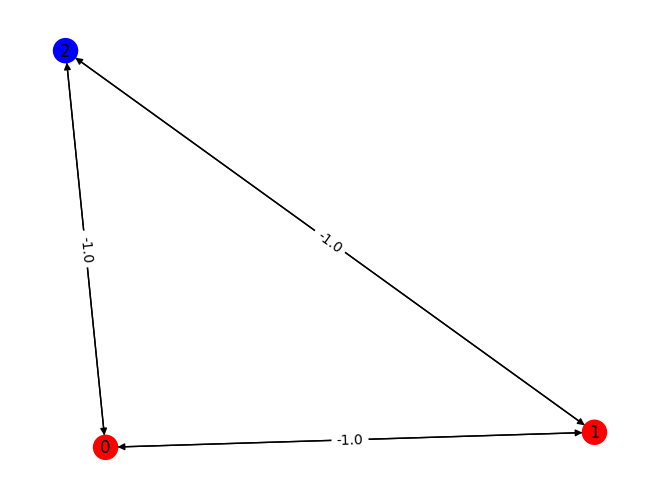

-------------------
Magnetization:  -1
H: -1.0


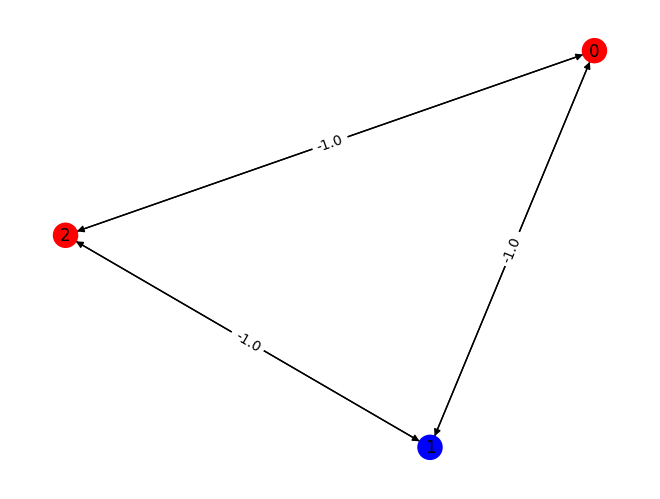

-------------------
Magnetization:  1
H: -1.0


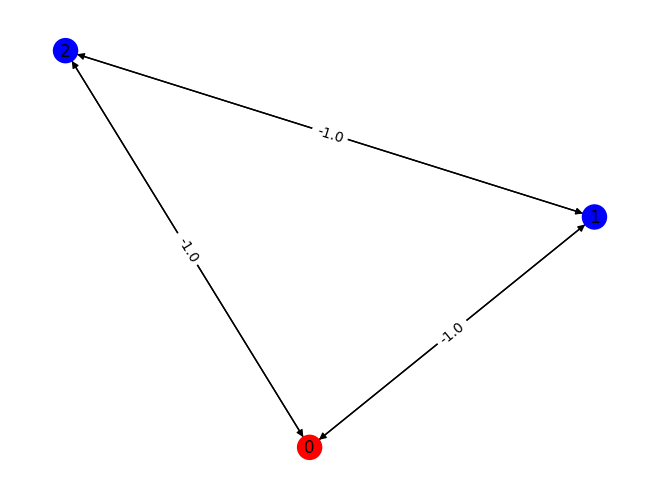

In [13]:
# Filter the solutions and visualize only the ground states
analize_solutions(best_solutions, A)

# N = 8

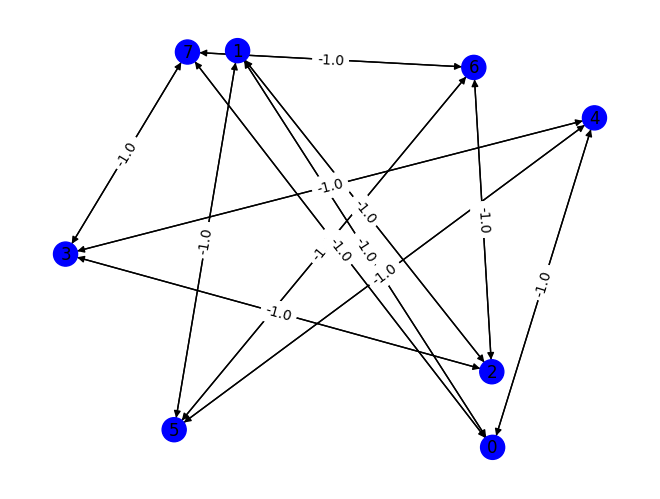

In [17]:
A0 =np.array([[0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0],
              [1, 0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0, 1, 0, 0],
              [1, 0, 0, 1, 0, 0, 1, 0]])

At = np.transpose(A0)
A = A0 + At
A = -A
X = np.ones(A.shape[0])

generate_graph(A,X)

In [18]:
%%capture
# Calculate solutions
best_solutions = generate_solutions(A)

Solutions found:  4
-------------------
Magnetization:  0
H: -8.0


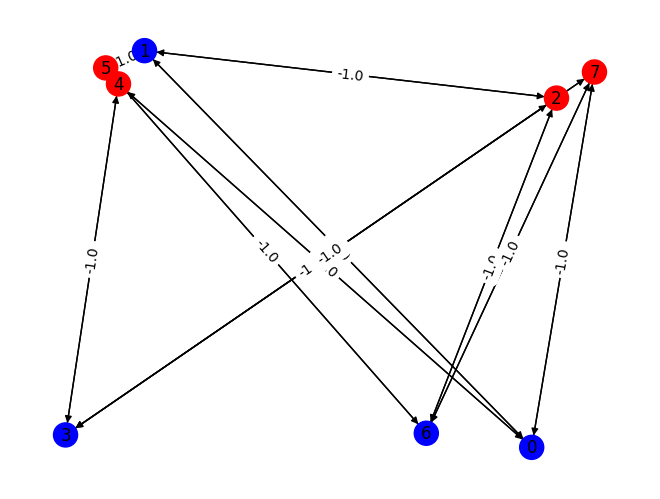

-------------------
Magnetization:  0
H: -8.0


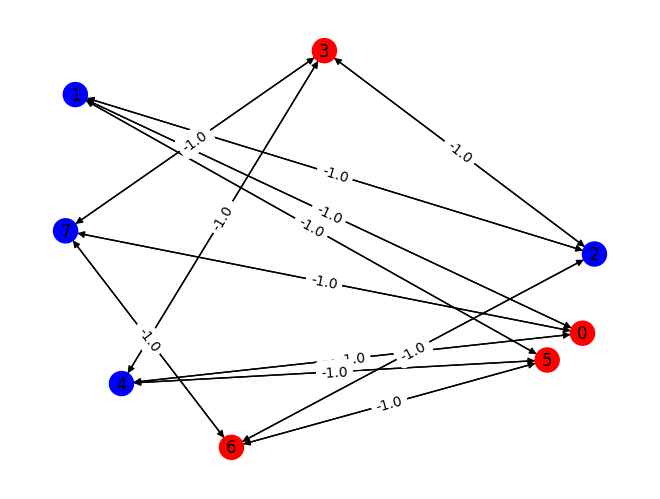

-------------------
Magnetization:  0
H: -8.0


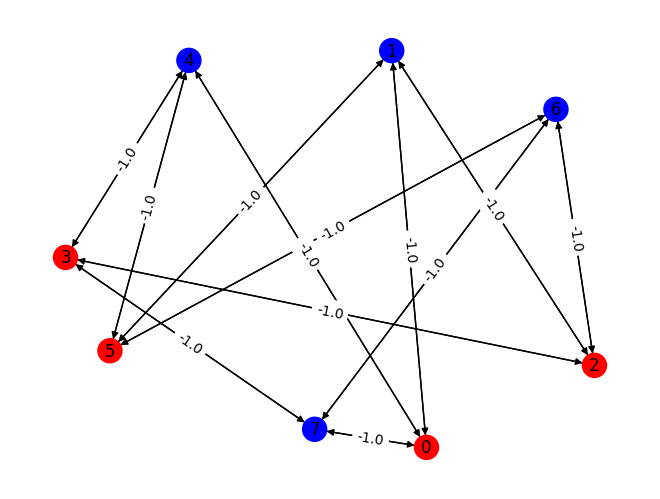

-------------------
Magnetization:  0
H: -8.0


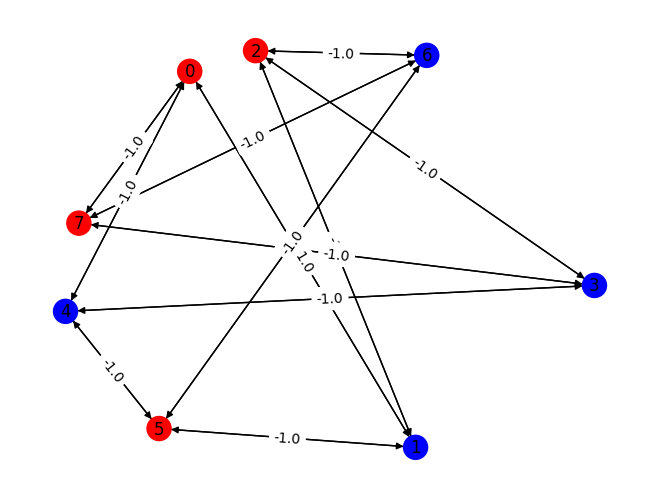

In [19]:
# Filter the solutions and visualize only the ground states
analize_solutions(best_solutions, A)

### Random N=20 configuration

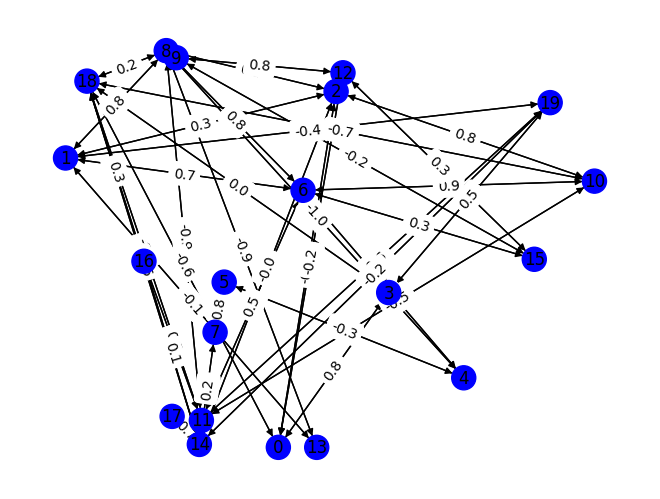

In [20]:
# Interaction matrix
A0 = np.random.uniform(-1,1,(20,20))
for i in range(A0.shape[0]):
    for j in range(i, A0.shape[0]):
        A0[i,j]=0
        r = np.random.rand()
        if r<0.8:
            A0[j,i]=0
        
At = np.transpose(A0)
A = A0 + At
#A = -A
X = np.ones(A.shape[0])

# plot the graph
generate_graph(A,X)

In [21]:
%%capture
# Calculate solutions
best_solutions = generate_solutions(A)

Solutions found:  2
-------------------
Magnetization:  4
H: -14.039422255970942


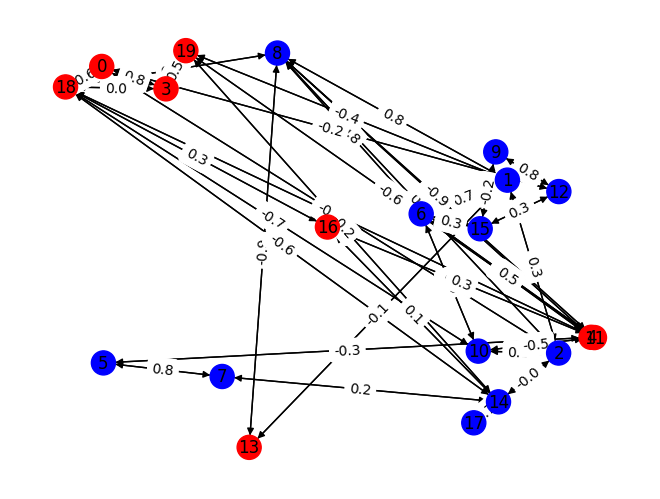

In [22]:
# Filter solutions
analize_solutions(best_solutions, A)